In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot



In [3]:
data_train = pd.read_csv('/content/Ben_fulltrain.csv')
data_train.head()

Unnamed: 0                                               Text  label
0           0  কবির সিংহ একেবারে জ্ঞানহীন সিনেমা .... এখানকার...      2
1           1  @ তরুন ভার্মা আপনি কোন মেয়েকে দেখেছেন যে আমি ...      2
2           2  কিছু লোক ভাল জিনিস পছন্দ করেন না তাদের সম্পর্ক...      2
3           3              ভাই আপনি এই প্রজন্মের একজন ত্রাণকর্তা      2
4           4  আমি নারীবাদী নই ... L n আমি লাস্ট স্টোরিগুলি ঘ...      2

In [4]:
data_test = pd.read_csv('/content/trac2_iben_dev.csv')

In [5]:
data_test.drop(['ID','Sub-task B'], axis=1, inplace=True)

In [6]:
NAG_test = data_test[(data_test['Sub-task A']=='NAG')]
OAG_test= data_test[(data_test['Sub-task A']=='CAG')]
CAG_test = data_test[(data_test['Sub-task A']=='OAG')]

In [7]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_test["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_test["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_test["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

NAG_test.head()

Text  Sub-task A
0   Ek dom sothik kotha bolecho jhekane theka uthe...           0
2                                    DARUN AKDOM THIK           0
5                                     Kadam thik dada           0
12                               Supar bolla cho dada           0
15                                              Pagle           0

In [8]:
data_test = pd.concat([NAG_test,
                  OAG_test,
                  CAG_test
                 ],axis=0)

data_test.reset_index(inplace=True)

In [9]:

data_test = data_test.rename(columns = {'Sub-task A': 'label'}, inplace = False)

In [10]:
X = data_train.Text.astype(str)
Y = data_train.label
#le = LabelEncoder()
#Y = le.fit_transform(Y)
#Y = Y.reshape(-1,1)

In [11]:
X_train,X_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.15)

In [12]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[60, 60, 225, 191]]


In [13]:

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(data_test['Text'].tolist()) )


In [14]:

x_train = pad_sequences(x_train, padding='post', maxlen=150)
x_valid = pad_sequences(x_valid, padding='post', maxlen=150)
x_test = pad_sequences(x_test, padding='post', maxlen=150)

In [15]:
train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(data_test['label'].tolist())

In [16]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [17]:

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [18]:
n_inputs = X.shape

In [19]:
t = MinMaxScaler()
t.fit(x_train)
x_train = t.transform(x_train)
x_test = t.transform(x_test)

In [20]:
sequence_length = 150

In [21]:
n_inputs = sequence_length

In [22]:

# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [23]:
from google.colab import drive



In [24]:
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
filepath = "/content/drive/MyDrive/Aggression_detection/autoencoderLSTM_with__aug/encoder_ben_file/encoder1.h5"



In [26]:
from keras.models import load_model


Epoch 1/30
430/430 - 3s - loss: 0.0264 - val_loss: 0.0028
Epoch 2/30
430/430 - 2s - loss: 0.0053 - val_loss: 0.0025
Epoch 3/30
430/430 - 2s - loss: 0.0048 - val_loss: 0.0019
Epoch 4/30
430/430 - 2s - loss: 0.0044 - val_loss: 0.0018
Epoch 5/30
430/430 - 2s - loss: 0.0042 - val_loss: 0.0012
Epoch 6/30
430/430 - 2s - loss: 0.0038 - val_loss: 0.0012
Epoch 7/30
430/430 - 2s - loss: 0.0036 - val_loss: 0.0011
Epoch 8/30
430/430 - 2s - loss: 0.0033 - val_loss: 0.0015
Epoch 9/30
430/430 - 2s - loss: 0.0032 - val_loss: 9.7819e-04
Epoch 10/30
430/430 - 2s - loss: 0.0029 - val_loss: 0.0012
Epoch 11/30
430/430 - 2s - loss: 0.0028 - val_loss: 0.0011
Epoch 12/30
430/430 - 2s - loss: 0.0027 - val_loss: 9.0846e-04
Epoch 13/30
430/430 - 2s - loss: 0.0025 - val_loss: 9.3924e-04
Epoch 14/30
430/430 - 2s - loss: 0.0024 - val_loss: 7.7009e-04
Epoch 15/30
430/430 - 2s - loss: 0.0022 - val_loss: 9.3997e-04
Epoch 16/30
430/430 - 2s - loss: 0.0022 - val_loss: 9.4096e-04
Epoch 17/30
430/430 - 2s - loss: 0.0020 -

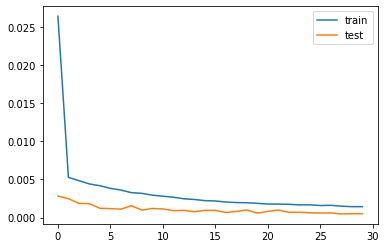

In [27]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(x_train, x_train, epochs=30, batch_size=16, verbose=2, validation_data=(x_test,x_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save(filepath)

In [28]:

# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define model
model = LogisticRegression()
# fit model on training set
model.fit(x_train, y_train)
# make prediction on test set
yhat = model.predict(x_test)
# calculate accuracy
acc = accuracy_score(test_labels, yhat)
print(acc)

0.5433646812957158


In [29]:

encoder = load_model('/content/drive/MyDrive/Aggression_detection/autoencoderLSTM_with__aug/encoder_eng_file/encoder1.h5')

In [30]:


# encode the train data
X_train_encode = encoder.predict(x_train)
# encode the test data
X_test_encode = encoder.predict(x_test)


In [31]:

# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, train_labels)
# make predictions on the test set
yhat = model.predict(X_test_encode)

In [32]:

acc = accuracy_score(test_labels, yhat)
print(acc)

0.54858934169279


In [33]:
data_test['pred']= yhat

In [34]:

labels = [0,1,2]
    
print(classification_report(data_test['label'].tolist(),data_test['pred'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.57      0.93      0.71       522
           1       0.40      0.12      0.18       218
           2       0.33      0.07      0.11       217

    accuracy                           0.55       957
   macro avg       0.43      0.37      0.34       957
weighted avg       0.48      0.55      0.45       957

